In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [4]:
pd.DataFrame(X, columns = ["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [5]:
pd.DataFrame(y, columns = ["diabetes"])

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,0


In [6]:
X


array([['Female', 80.0, 0, ..., 25.19, 6.6, 140],
       ['Female', 54.0, 0, ..., 27.32, 6.6, 80],
       ['Male', 28.0, 0, ..., 27.32, 5.7, 158],
       ...,
       ['Male', 66.0, 0, ..., 27.83, 5.7, 155],
       ['Female', 24.0, 0, ..., 35.42, 4.0, 100],
       ['Female', 57.0, 0, ..., 22.43, 6.6, 90]], dtype=object)

In [7]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [18]:
print(X)

[[0 80.0 0 ... 25.19 6.6 140]
 [0 54.0 0 ... 27.32 6.6 80]
 [1 28.0 0 ... 27.32 5.7 158]
 ...
 [1 66.0 0 ... 27.83 5.7 155]
 [0 24.0 0 ... 35.42 4.0 100]
 [0 57.0 0 ... 22.43 6.6 90]]


In [20]:
X

array([[0.0, 0.0, 0.0, ..., 25.19, 6.6, 140],
       [1.0, 0.0, 0.0, ..., 27.32, 6.6, 80],
       [0.0, 0.0, 0.0, ..., 27.32, 5.7, 158],
       ...,
       [0.0, 0.0, 0.0, ..., 27.83, 5.7, 155],
       [0.0, 0.0, 0.0, ..., 35.42, 4.0, 100],
       [0.0, 1.0, 0.0, ..., 22.43, 6.6, 90]], dtype=object)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ANN Building 

In [24]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=5, activation='linear'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
ann.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
   1/2500 [..............................] - ETA: 6:31 - loss: 0.6487 - accuracy: 0.9688

2023-09-03 23:01:40.271629: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2500/2500 [==============================] - 1s 299us/step - loss: 0.5991 - accuracy: 0.9150
Epoch 2/100
2500/2500 [==============================] - 1s 279us/step - loss: 0.5901 - accuracy: 0.9150
Epoch 3/100
2500/2500 [==============================] - 1s 276us/step - loss: 0.5802 - accuracy: 0.9150
Epoch 4/100
2500/2500 [==============================] - 1s 287us/step - loss: 0.5701 - accuracy: 0.9150
Epoch 5/100
2500/2500 [==============================] - 1s 275us/step - loss: 0.5601 - accuracy: 0.9150
Epoch 6/100
2500/2500 [==============================] - 1s 277us/step - loss: 0.5501 - accuracy: 0.9150
Epoch 7/100
2500/2500 [==============================] - 1s 296us/step - loss: 0.5404 - accuracy: 0.9150
Epoch 8/100
2500/2500 [==============================] - 1s 288us/step - loss: 0.5309 - accuracy: 0.9150
Epoch 9/100
2500/2500 [==============================] - 1s 284us/step - loss: 0.5217 - accuracy: 0.9150
Epoch 10/100
2500/2500 [==============================] - 1s 300us/

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

625/625 [==============================] - 0s 197us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: " + str(accuracy))
print("Specificity: " + str(specificity))
print("Sensitivity: " + str(sensitivity))

[[18297     0]
 [ 1703     0]]
Accuracy: 0.91485
Specificity: 1.0
Sensitivity: 0.0


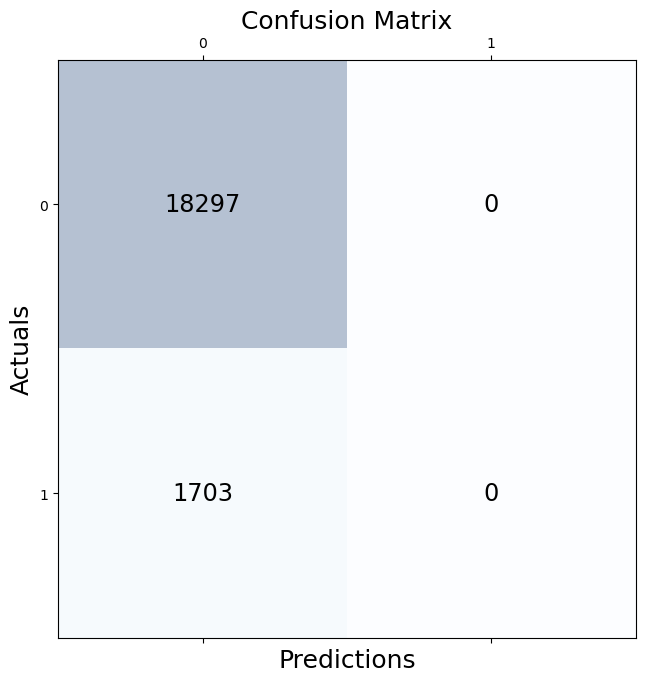

In [28]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()